In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pylab import rcParams
import calendar
from datetime import datetime, timedelta
from scipy.spatial.distance import cdist


from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


rcParams['figure.figsize'] = 16,4


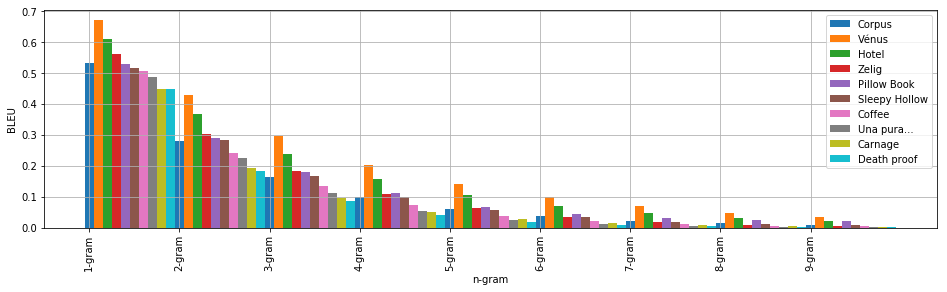

In [4]:
width = 0.1
all_ = [0.5328,   0.2790,   0.1648,   0.0980,   0.0593,   0.0362,   0.0220,   0.0137,   0.0087];
venus = [0.6698,   0.4280,   0.2947,   0.2013,   0.1401,   0.0980,   0.0682,   0.0484,   0.0332];
hotel = [0.6114,   0.3665,   0.2368,   0.1556,   0.1039,   0.0695,   0.0465,   0.0307,   0.0198];
zelig = [0.5603,   0.3026,   0.1819,   0.1082,   0.0622,   0.0330,   0.0168,   0.0088,   0.0048];
pillow = [0.5304,   0.2884,   0.1798,   0.1116,   0.0674,   0.0445,   0.0309,   0.0237,   0.0200];
hollow = [0.5165,   0.2822,   0.1680,   0.0980,   0.0569,   0.0336,   0.0195,   0.0124,   0.0078];
coffee = [0.5059,   0.2425,   0.1354,   0.0717,   0.0381,   0.0206,   0.0110,   0.0061,   0.0037];
pure = [0.4861,   0.2247,   0.1116,   0.0533,   0.0246,   0.0127,   0.0065,   0.0033,   0.0021];
carnage = [0.4480,   0.1933,   0.0969,   0.0502,   0.0274,   0.0147,   0.0072,   0.0036,   0.0022];
proof = [0.4466,   0.1814,   0.0851,   0.0401,   0.0193,   0.0085,   0.0035,   0.0008,   0.0004];
fig = plt.figure()
ax = plt.subplot(111)

ax.bar(range(9), all_, width, linestyle='-', label="{}".format('Corpus'))
ax.bar([x + 0.1 for x in range(9)], venus, width, linestyle='-', label="{}".format('Vénus'))
ax.bar([x + 0.2 for x in range(9)], hotel, width, linestyle='-', label="{}".format('Hotel'))
ax.bar([x + 0.3 for x in range(9)], zelig, width, linestyle='-', label="{}".format('Zelig'))
ax.bar([x + 0.4 for x in range(9)], pillow, width, linestyle='-', label="{}".format('Pillow Book'))
ax.bar([x + 0.5 for x in range(9)], hollow, width, linestyle='-', label="{}".format('Sleepy Hollow'))
ax.bar([x + 0.6 for x in range(9)], coffee, width, linestyle='-', label="{}".format('Coffee'))
ax.bar([x + 0.7 for x in range(9)], pure, width, linestyle='-', label="{}".format('Una pura...'))
ax.bar([x + 0.8 for x in range(9)], carnage, width, linestyle='-', label="{}".format('Carnage'))
ax.bar([x + 0.9 for x in range(9)], proof, width, linestyle='-', label="{}".format('Death proof'))
plt.xticks(range(9),['1-gram','2-gram','3-gram','4-gram','5-gram','6-gram','7-gram','8-gram','9-gram'], rotation=90)
plt.legend(loc='best')
plt.xlabel('n-gram')
plt.ylabel('BLEU')
plt.grid()
plt.show()

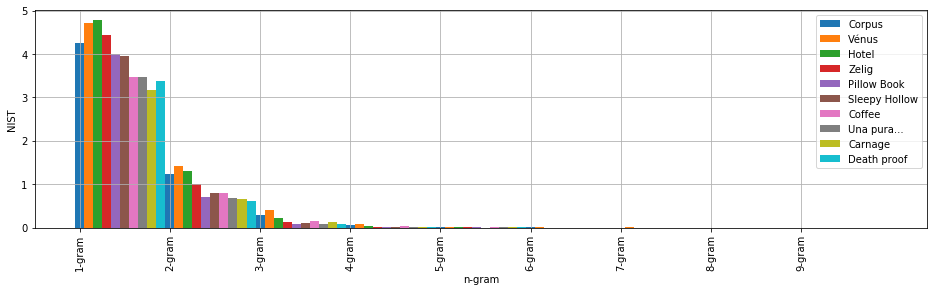

In [25]:

width = 0.1
all_ = [4.2516,1.2337,0.2849,   0.0511,   0.0104,   0.0012,   0.0004,   0.0001,   0.0001];
venus = [4.7035,1.4197,0.3950,   0.0860,   0.0178,   0.0039,  0.0012,   0.0008,   0.0000];
hotel = [4.7734,1.2973,0.2098,   0.0346,   0.0056,   0.0004,   0.0000,  0.0000,   0.0000];
zelig = [4.4436,1.0031,0.1356,   0.0184,   0.0042,   0.0003,   0.0003,   0.0000,   0.0000];
pillow = [3.9961,0.7058,0.0844,   0.0135,   0.0033,   0.0006,   0.0000,   0.0000,   0.0000];
hollow = [3.9468,0.7896,0.1089,   0.0124,   0.0010,   0.0000,   0.0000,   0.0000,   0.0000];
coffee = [3.4646,0.8002,0.1439,   0.0275,   0.0051,   0.0006,   0.0000,   0.0000,   0.0000];
pure = [3.4730,0.6916,0.0913,   0.0216,   0.0026,   0.0010,   0.0004,   0.0005,   0.0005];
carnage = [3.1597,0.6548,0.1211,   0.0220,   0.0036,   0.0001,   0.0001,   0.0000,   0.0000];
proof = [3.3713,0.6174,0.0861,   0.0084,   0.0018,   0.0001,   0.0000,   0.0000,   0.0000];
fig = plt.figure()
ax = plt.subplot(111)

ax.bar(range(9), all_, width, linestyle='-', label="{}".format('Corpus'))
ax.bar([x + 0.1 for x in range(9)], venus, width, linestyle='-', label="{}".format('Vénus'))
ax.bar([x + 0.2 for x in range(9)], hotel, width, linestyle='-', label="{}".format('Hotel'))
ax.bar([x + 0.3 for x in range(9)], zelig, width, linestyle='-', label="{}".format('Zelig'))
ax.bar([x + 0.4 for x in range(9)], pillow, width, linestyle='-', label="{}".format('Pillow Book'))
ax.bar([x + 0.5 for x in range(9)], hollow, width, linestyle='-', label="{}".format('Sleepy Hollow'))
ax.bar([x + 0.6 for x in range(9)], coffee, width, linestyle='-', label="{}".format('Coffee'))
ax.bar([x + 0.7 for x in range(9)], pure, width, linestyle='-', label="{}".format('Una pura...'))
ax.bar([x + 0.8 for x in range(9)], carnage, width, linestyle='-', label="{}".format('Carnage'))
ax.bar([x + 0.9 for x in range(9)], proof, width, linestyle='-', label="{}".format('Death proof'))
plt.xticks(range(9),['1-gram','2-gram','3-gram','4-gram','5-gram','6-gram','7-gram','8-gram','9-gram'], rotation=90)
plt.legend(loc='best')
plt.xlabel('n-gram')
plt.ylabel('NIST')
plt.grid()
plt.show()


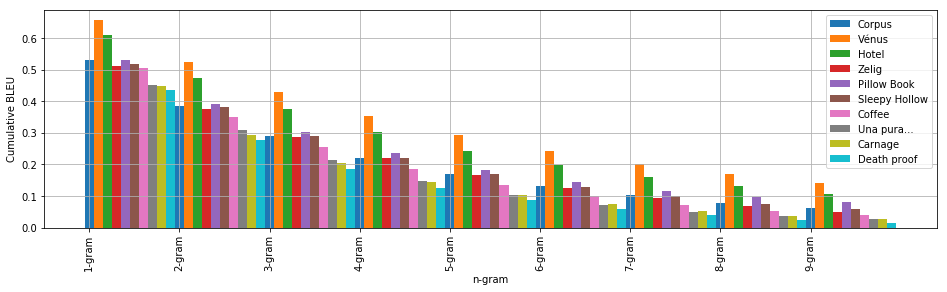

In [27]:

width = 0.1
all_ = [0.5319,   0.3849,   0.2899,   0.2209,   0.1698,   0.1312,   0.1016,   0.0791,   0.0619];
venus = [0.6559,   0.5243,   0.4297,   0.3536,   0.2926,   0.2430,   0.2021,   0.1685,   0.1404];
hotel = [0.6114,   0.4734,   0.3758,   0.3014,   0.2436,   0.1977,   0.1607,   0.1307,   0.1060];
zelig = [0.5118,  0.3761,   0.2865,   0.2195,   0.1675,   0.1259,   0.0932,   0.0686,   0.0505];
pillow = [0.5304,   0.3911,   0.3018,   0.2354,   0.1833,   0.1448,   0.1161,   0.0952,   0.0800];
hollow = [0.5165,   0.3818,   0.2904,   0.2213,   0.1687,   0.1289,   0.0984,   0.0760,   0.0590];
coffee = [0.5059,   0.3503,   0.2551,   0.1857,   0.1353,   0.0988,   0.0723,   0.0531,   0.0395];
pure = [0.4528,   0.3078,   0.2144,   0.1487,   0.1023,   0.0714,   0.0502,   0.0354,   0.0257];
carnage = [0.4480,   0.2943,   0.2032,   0.1433,   0.1030,   0.0744,   0.0533,   0.0380,   0.0277];
proof = [0.4354,   0.2775,   0.1856,   0.1258,   0.0860,   0.0582,   0.0388,   0.0238,   0.0149];
fig = plt.figure()
ax = plt.subplot(111)

ax.bar(range(9), all_, width, linestyle='-', label="{}".format('Corpus'))
ax.bar([x + 0.1 for x in range(9)], venus, width, linestyle='-', label="{}".format('Vénus'))
ax.bar([x + 0.2 for x in range(9)], hotel, width, linestyle='-', label="{}".format('Hotel'))
ax.bar([x + 0.3 for x in range(9)], zelig, width, linestyle='-', label="{}".format('Zelig'))
ax.bar([x + 0.4 for x in range(9)], pillow, width, linestyle='-', label="{}".format('Pillow Book'))
ax.bar([x + 0.5 for x in range(9)], hollow, width, linestyle='-', label="{}".format('Sleepy Hollow'))
ax.bar([x + 0.6 for x in range(9)], coffee, width, linestyle='-', label="{}".format('Coffee'))
ax.bar([x + 0.7 for x in range(9)], pure, width, linestyle='-', label="{}".format('Una pura...'))
ax.bar([x + 0.8 for x in range(9)], carnage, width, linestyle='-', label="{}".format('Carnage'))
ax.bar([x + 0.9 for x in range(9)], proof, width, linestyle='-', label="{}".format('Death proof'))
plt.xticks(range(9),['1-gram','2-gram','3-gram','4-gram','5-gram','6-gram','7-gram','8-gram','9-gram'], rotation=90)
plt.legend(loc='best')
plt.xlabel('n-gram')
plt.ylabel('Cumulative BLEU')
plt.grid()
plt.show()


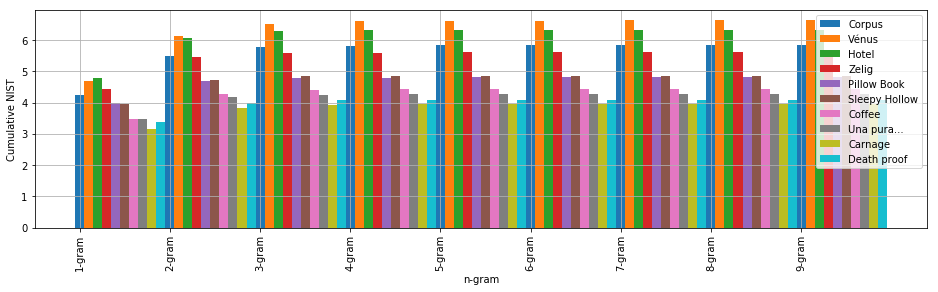

In [28]:

width = 0.1
all_ = [4.2516,   5.4852,   5.7702,   5.8213,   5.8317,   5.8329,   5.8332,   5.8334,   5.8334];
venus = [4.7035,   6.1231,   6.5182,   6.6042,   6.6219,   6.6258,   6.6270,   6.6278,   6.6278];
hotel = [4.7734,   6.0707,   6.2805,   6.3150,   6.3207,   6.3211,   6.3211,   6.3211,   6.3211];
zelig = [4.4436,   5.4467,   5.5823,   5.6008,   5.6049,   5.6052,   5.6055,   5.6055,   5.6055];
pillow = [3.9961,   4.7019,   4.7863,   4.7997,   4.8030,   4.8036,   4.8036,   4.8036,   4.8036];
hollow = [3.9468,   4.7363,   4.8452,   4.8576,   4.8586,   4.8586,   4.8586,   4.8586,   4.8586];
coffee = [3.4646,   4.2648,   4.4087,   4.4361,   4.4412,   4.4418,   4.4418,   4.4418,   4.4418];
pure = [3.4730,   4.1646,   4.2559,   4.2775,   4.2801,   4.2810,   4.2814,   4.2819,   4.2825];
carnage = [3.1597,   3.8145,   3.9356,   3.9576,   3.9612,   3.9614,   3.9615,   3.9615,   3.9615];
proof = [3.3713,   3.9886,   4.0747,   4.0832,   4.0850,   4.0851,   4.0851,   4.0851,   4.0851];
fig = plt.figure()
ax = plt.subplot(111)

ax.bar(range(9), all_, width, linestyle='-', label="{}".format('Corpus'))
ax.bar([x + 0.1 for x in range(9)], venus, width, linestyle='-', label="{}".format('Vénus'))
ax.bar([x + 0.2 for x in range(9)], hotel, width, linestyle='-', label="{}".format('Hotel'))
ax.bar([x + 0.3 for x in range(9)], zelig, width, linestyle='-', label="{}".format('Zelig'))
ax.bar([x + 0.4 for x in range(9)], pillow, width, linestyle='-', label="{}".format('Pillow Book'))
ax.bar([x + 0.5 for x in range(9)], hollow, width, linestyle='-', label="{}".format('Sleepy Hollow'))
ax.bar([x + 0.6 for x in range(9)], coffee, width, linestyle='-', label="{}".format('Coffee'))
ax.bar([x + 0.7 for x in range(9)], pure, width, linestyle='-', label="{}".format('Una pura...'))
ax.bar([x + 0.8 for x in range(9)], carnage, width, linestyle='-', label="{}".format('Carnage'))
ax.bar([x + 0.9 for x in range(9)], proof, width, linestyle='-', label="{}".format('Death proof'))
plt.xticks(range(9),['1-gram','2-gram','3-gram','4-gram','5-gram','6-gram','7-gram','8-gram','9-gram'], rotation=90)
plt.legend(loc='best')
plt.xlabel('n-gram')
plt.ylabel('Cumulative NIST')
plt.grid()
plt.show()
